In [1]:
import cv2
import numpy as np
import glob
import os
import matplotlib.pyplot as plt

C:\Users\issne\miniconda3\envs\ml\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\issne\miniconda3\envs\ml\lib\site-packages\numpy\.libs\libopenblas.4SP5SUA7CBGXUEOC35YP2ASOICYYEQZZ.gfortran-win_amd64.dll
C:\Users\issne\miniconda3\envs\ml\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
def show_img(img):
    plt.figure(figsize=(15,15))
    plt.imshow(img)
    plt.axis("off")
    plt.show()
def draw_boxes(img,boxes):
    for i in range(len(boxes)):
        xmin,ymin = list(map(int,boxes[i][0]))
        xmax,ymax = list(map(int,boxes[i][2]))
        cv2.rectangle(img,(xmin,ymin),(xmax,ymax),(255,0,0),2)
    return img
def rec_visual(img,boxes,res):
    img = img.copy()
    img = draw_boxes(img,boxes)
    right_frame = np.zeros(img.shape,dtype=np.uint8)
    for i in range(len(res)):
        xmin,ymin = list(map(int,boxes[i][0]))
        xmax,ymax = list(map(int,boxes[i][2]))
#         xmin,ymin,xmax,ymax = pad(xmin,ymin,xmax,ymax,pd)
        cv2.putText(right_frame,res[i][0],(xmin+5,ymin),cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)
    new_img = np.concatenate((img,right_frame),axis=1)
    return new_img
def create_nd_arr(path):
    # img = cv2.resize(cv2.imread(path),(640,640))
    img = cv2.imread(path)
    return img

In [3]:
from paddleocr import PaddleOCR

C:\Users\issne\miniconda3\envs\ml\lib\site-packages\paddle\fluid\framework.py:516: UserWarning: You are using GPU version Paddle, but your CUDA device is not set properly. CPU device will be used by default.
  warnings.warn(


In [4]:
ocr = PaddleOCR(lang='en',use_gpu=False,use_angle_cls=True)

[2022/10/02 16:55:12] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, shape_info_filename=None, precision='fp32', gpu_mem=500, image_dir=None, det_algorithm='DB', det_model_dir='C:\\Users\\issne/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_sast_polygon=False, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_box_type='quad', det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, det_fce_box_type='poly', rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\issne/.paddleocr/whl\\rec\\en\\en_PP-OCRv3_rec_infer', rec_image_shape='3, 48, 320', rec_batch_n

In [219]:
img = create_nd_arr('sd.png')

In [220]:
import cv2
import numpy as np

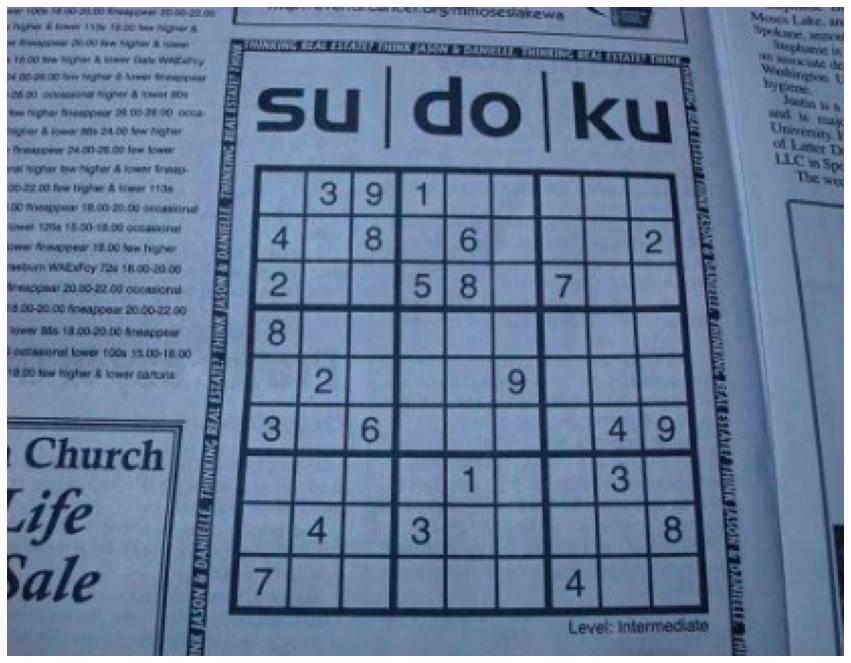

In [221]:
show_img(img)

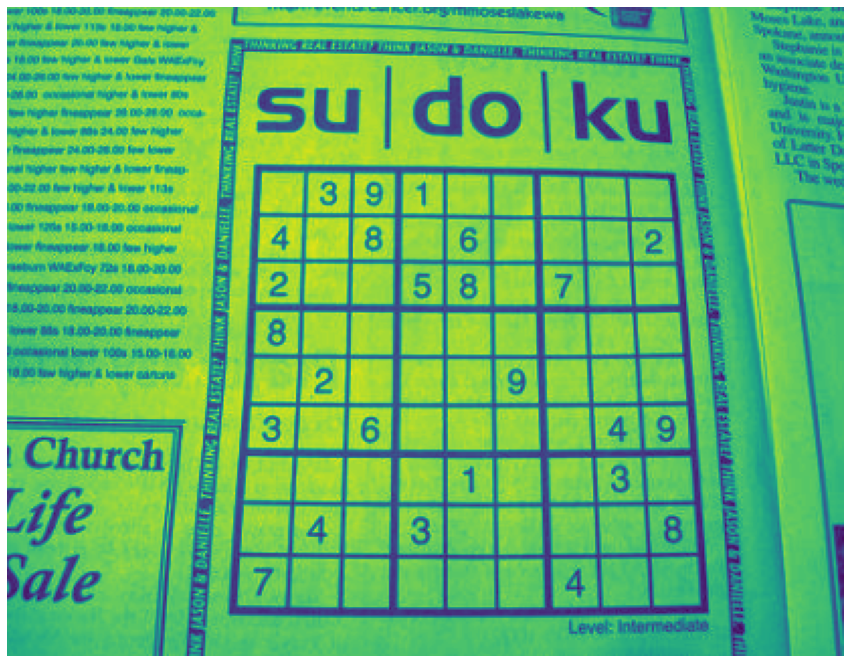

In [222]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
show_img(gray)

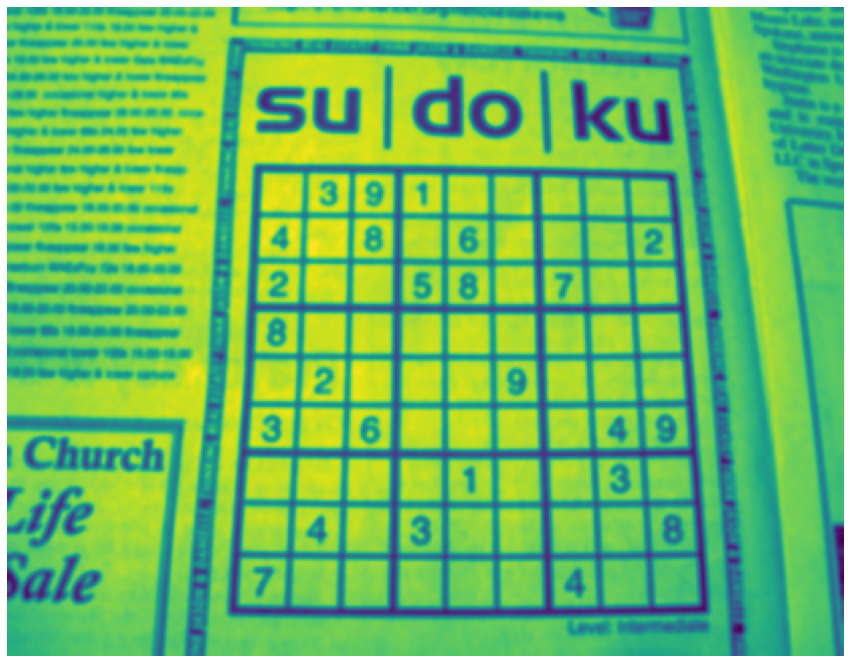

In [223]:
blur = cv2.GaussianBlur(gray, (5,5), 0)
show_img(blur)

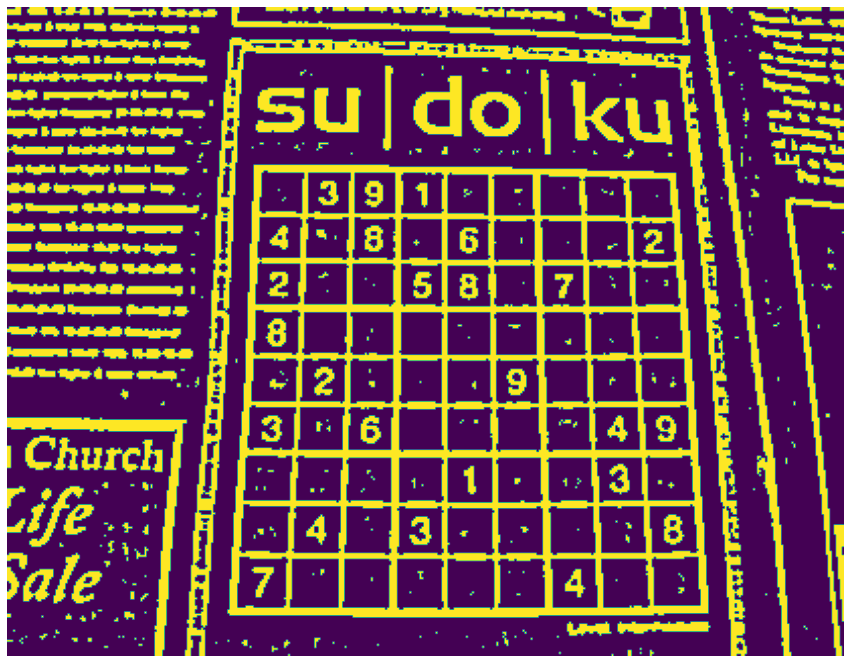

In [224]:
thresh = cv2.adaptiveThreshold(blur, 255, 1, 1, 11, 2)
show_img(thresh)

In [225]:
contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [226]:
max_area = 0
c = 0
for i in contours:
        area = cv2.contourArea(i)
        if area > 1000:
                if area > max_area:
                    max_area = area
                    best_cnt = i
                    image = cv2.drawContours(image, contours, c, (0, 255, 0), 3)
        c+=1

In [227]:
mask = np.zeros((gray.shape),np.uint8)
cv2.drawContours(mask,[best_cnt],0,255,-1)
cv2.drawContours(mask,[best_cnt],0,0,2)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

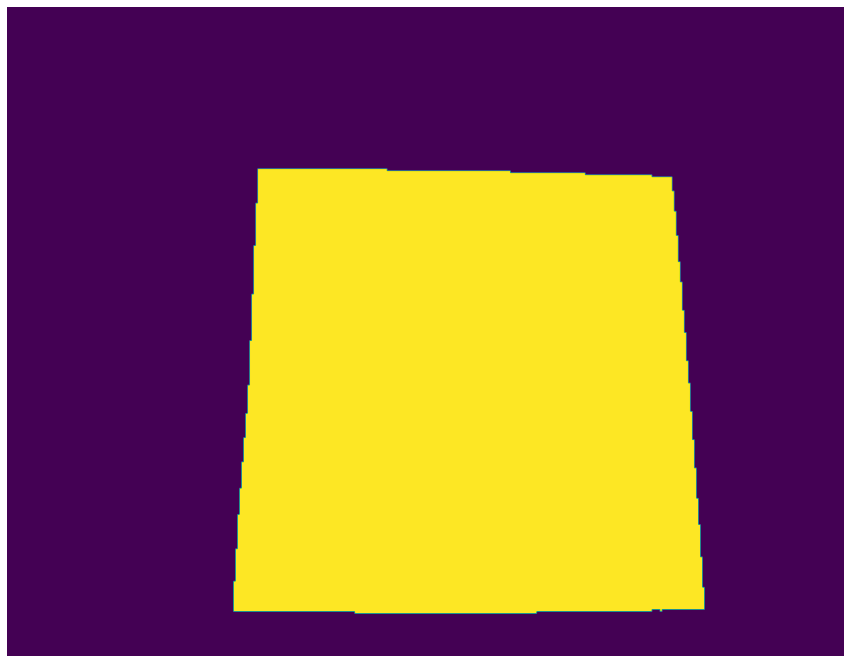

In [228]:
show_img(mask)

In [267]:
new_image = img.copy()
new_image[mask < 255,:] = 0


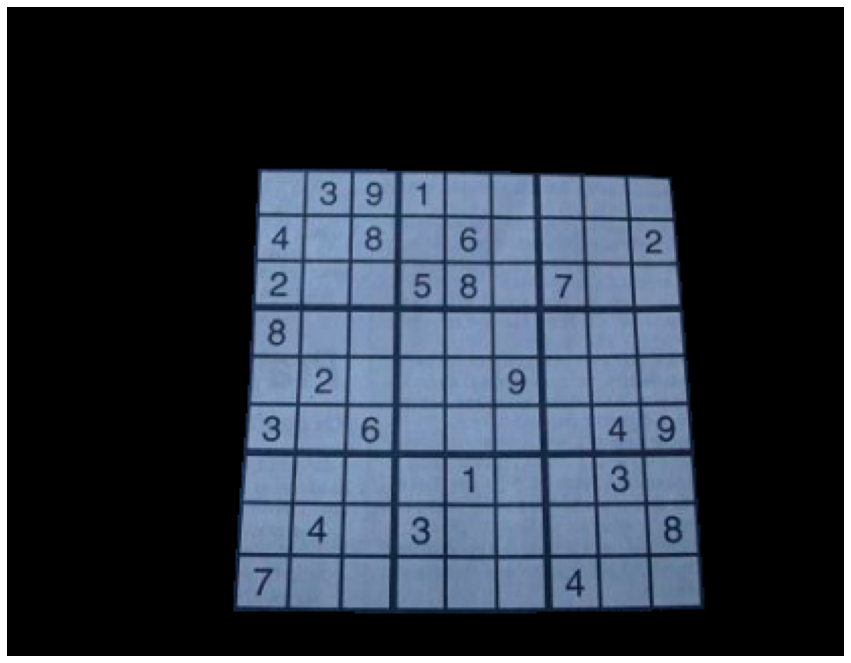

In [257]:
show_img(new_image)

In [206]:
out = np.zeros_like(gray)
out[mask == 255] = gray[mask == 255]

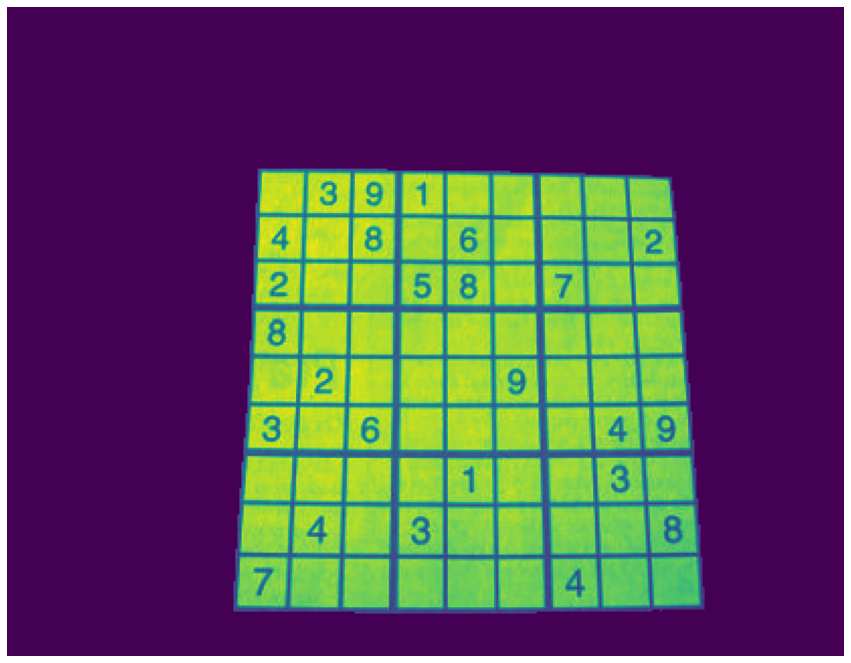

In [207]:
show_img(out)

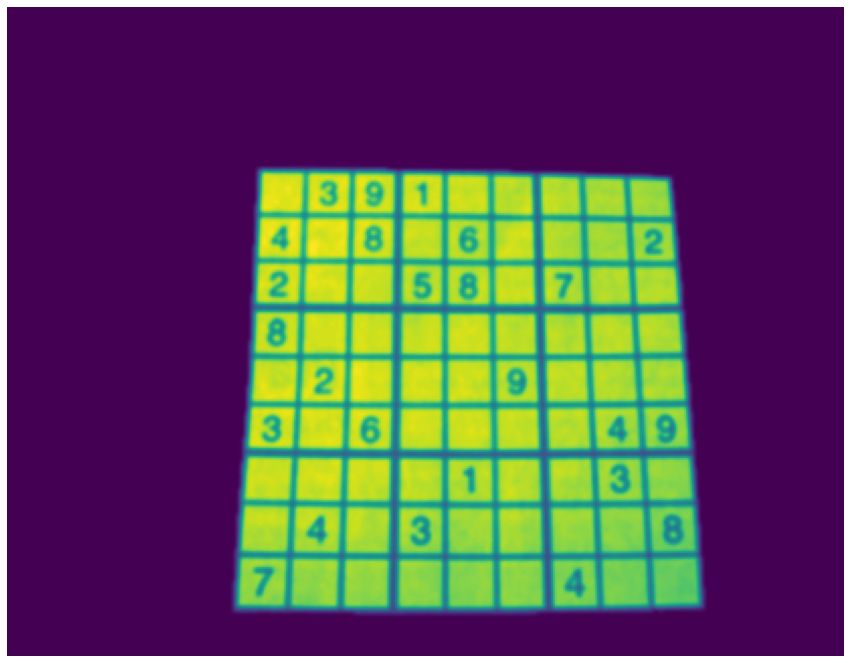

In [208]:
blur = cv2.GaussianBlur(out, (5,5), 0)
show_img(blur)

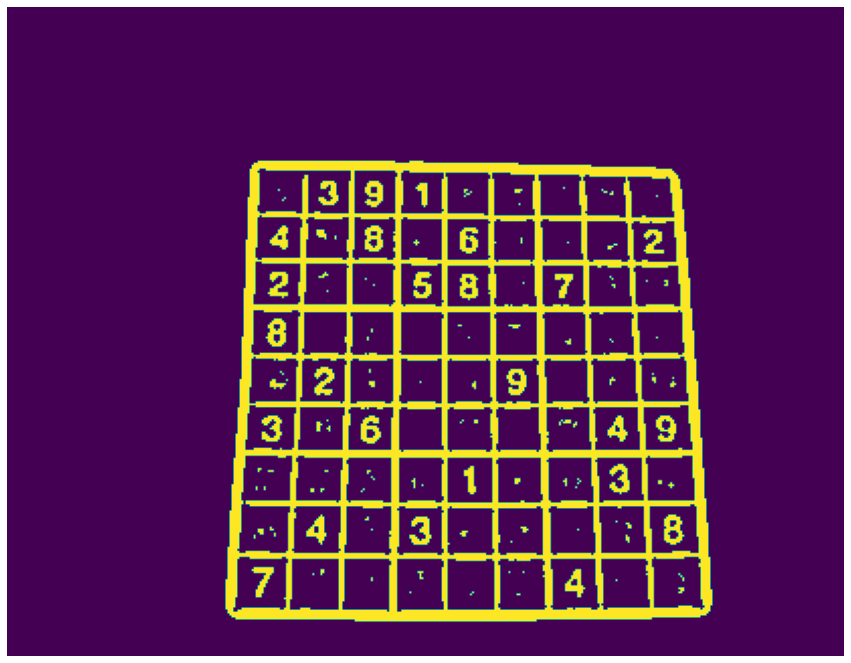

In [213]:
thresh = cv2.adaptiveThreshold(blur, 255, 1, 1, 11, 2)
show_img(thresh)

In [210]:
contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [211]:
c = 0
for i in contours:
        area = cv2.contourArea(i)
        if area > 1000/2:
#             x, y, w, h = cv2.boundingRect(i)
#             roi = img[y:y + h, x:x + w]
#             show_img(roi)
            cv2.drawContours(img, contours, c, (0, 255, 0), 3)
        c+=1

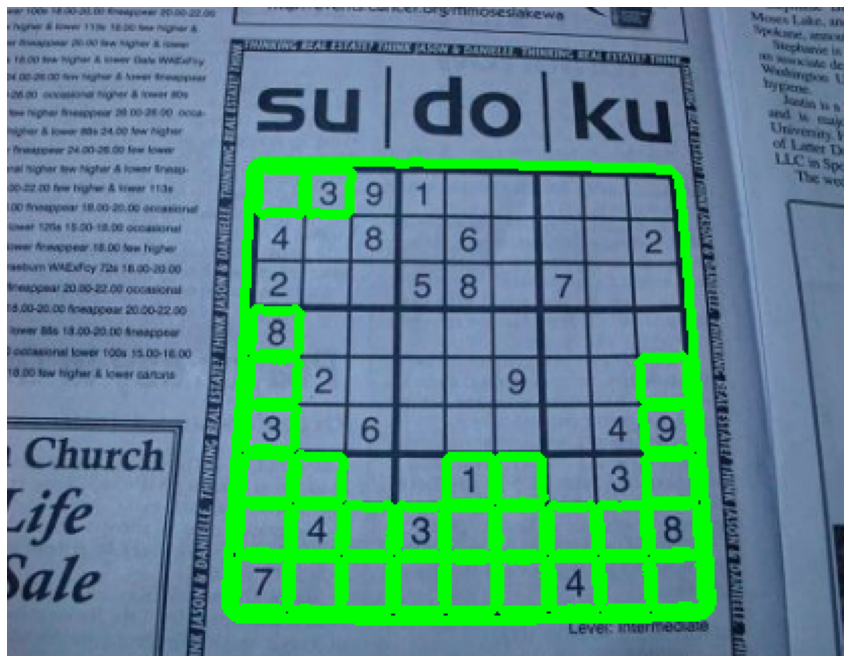

In [212]:
show_img(img)